# SGD

Depending on your implementation of ADALINE, SGD could be quite similar, or practically the same as ADALINE.

The only real difference is that in SGD we are actively training upon single samples. And to do this effectively (i.e. with fewer iterations) we need to make sure we're presenting a random view of the data.

Hence, we need to insert some code to randomise the data.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
h = 0.025
colours = np.array(["r", "b", "g", "k", "c", "m"])
def plot_decision(ax, clf, X):
    cmap = ListedColormap(colours[:len(np.unique(y))])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([clf.predict(x) for x in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
def plot_points(ax, X, y):
    ax.plot
    ax.scatter(X[:, 0], X[:, 1], c=colours[y])

In [3]:
iris = datasets.load_iris()
X, y = (iris.data[:100, [0, 2]], iris.target[:100])  # For simplicity, pick only two features and only two classes
y[y == 0] = -1.0
X_std = np.copy(X)
X_std = StandardScaler().fit_transform(X_std)

To implement SGD, we will use the following algorithm:

1. foreach iteration
    1. Randomise the data
    1. foreach instance
        1. Predict $\hat{y}$
        2. Calculate the error between $y$ and $\hat{y}$
        3. Create the weight update according to the ADALINE learning rule

The net input, weights and weight update algorithms are the same as ADALINE.

So you just need to add in a randomise function just before the inner-loop.

_Hint: `numpy.random.permutation`, creates a random index for our data_

In [4]:
class ADALINE:
    def __init__(self, itr=10, eta=0.01) -> None:
        self.n_iterations = itr
        self.eta = eta

    def fit(self, X, y) -> None:
        self.w_ = np.zeros(X.shape[1] + 1)              # Add one for bias input (threshold)
        self.errors_ = np.zeros(self.n_iterations)      # Array for holding errors

        for i in range(self.n_iterations):              # Foreach iteration
            for (x_i, y_i) in zip(X, y):                # Foreach training instance
                net_output = self.net_input(x_i)        # Output of net_input
                error = (y_i - net_output)
                self.errors_[i] += (error ** 2).sum() / 2.0  # Cost function

                # Update the weights. This is just linear gradient descent.
                self.w_[1:] += self.eta * x_i.T.dot(error)
                self.w_[0] += self.eta * error          # Update the bias weight
            self.errors_[i] /= len(y)                   # Average cost function

    def activation(self, X):                            # Activation is just linear
        return self.net_input(X)                        #  combination, same as net_input

    def net_input(self, X):
        return np.dot(self.w_[1:].T, X) + self.w_[0]    # Sum of weighted inputs

    def predict(self, X):
        if self.activation(X) >= 0:                     # Quantiser
            return 1.0
        else:
            return -1.0

class SGD:
    def __init__(self, itr=10, eta=0.01) -> None:
        self.n_iterations = itr
        self.eta = eta

    def fit(self, X, y) -> None:
        self.w_ = np.zeros(X.shape[1] + 1)              # Add one for bias input (threshold)
        self.errors_ = np.zeros(self.n_iterations)      # Array for holding errors

        for i in range(self.n_iterations):              # Foreach iteration
            X, y = self._shuffle(X, y)                  # Randomise the data on each iteration
            for (x_i, y_i) in zip(X, y):                # Foreach training instance
                cost = self._update_weights(x_i, y_i)   # Update weights
                self.errors_[i] += cost                 # Add cost
            self.errors_[i] /= len(y)                   # Average cost per iteration

    def _update_weights(self, x_i, y_i):
        net_output = self.net_input(x_i)  # Output of net_input
        error = (y_i - net_output)
        cost = (error ** 2).sum() / 2.0  # Cost function

        # Update the weights. This is just linear gradient descent.
        self.w_[1:] += self.eta * x_i.T.dot(error)
        self.w_[0] += self.eta * error  # Update the bias weight
        return cost

    def partial_fit(self, X, y):
        X, y = self._shuffle(X, y)
        for (x_i, y_i) in zip(X, y):  # Foreach training instance
            self._update_weights(x_i, y_i)

    def activation(self, X):                            # Activation is just linear
        return self.net_input(X)                        #  combination, same as net_input

    def net_input(self, X):
        return np.dot(self.w_[1:].T, X) + self.w_[0]    # Sum of weighted inputs

    def predict(self, X):
        if self.activation(X) >= 0:                     # Quantiser
            return 1.0
        else:
            return -1.0

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]


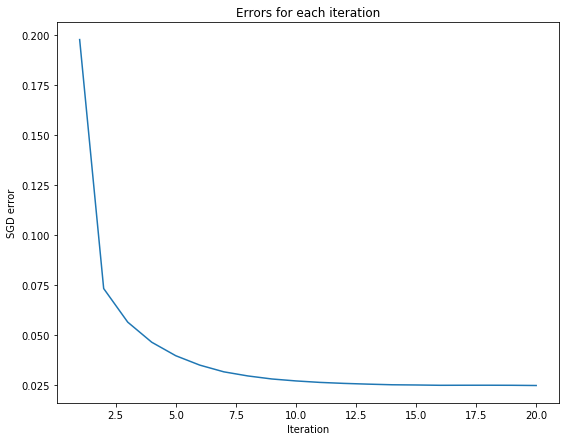

In [5]:
clf = SGD(eta=0.01, itr=20)
clf.fit(X_std, y)
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(range(1, len(clf.errors_) + 1), clf.errors_)
ax.set_title("Errors for each iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("SGD error")
plt.show()

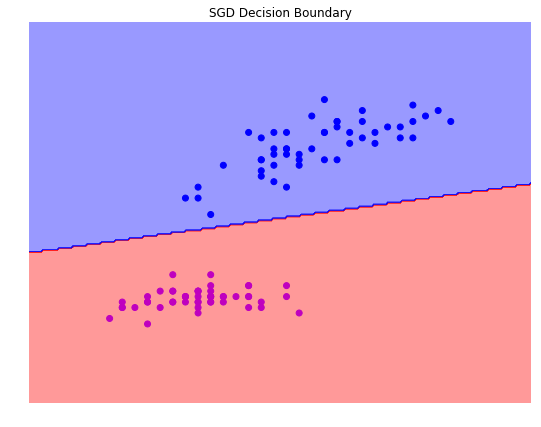

In [6]:
fig, ax = plt.subplots(figsize=(9, 7))
plot_decision(ax, clf, X_std)
plot_points(ax, X_std, y)
ax.set_axis_off()
ax.set_title("SGD Decision Boundary")
plt.show()

Now let's compare that to the ADALINE.

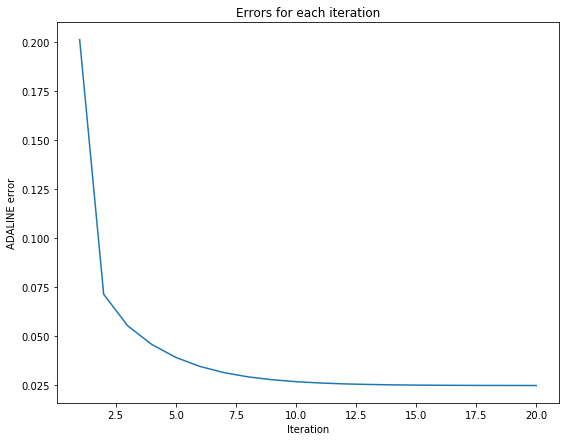

In [7]:
clf = ADALINE(eta=0.01, itr=20)
clf.fit(X_std, y)
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(range(1, len(clf.errors_) + 1), clf.errors_)
ax.set_title("Errors for each iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("ADALINE error")
plt.show()

Note that if you implemented your ADALINE class by updating weights for each instance, then the result will be very similar. This is because we accidentally implemented part of the SGD without thinking about it!

Generally though, SGD will converge faster, so long as you have randomised your data. This would become more obvious with larger datasets.